In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## READ IN MLB STATS FOR 1876-2018 SEASONS 

## Note: No salary data is used for regression in this case.

In [2]:
# read data from csv file for 2001-2018 MLB seasons
#df = pd.read_csv('MLB_STATS_1900-2018_BP.csv')
df = pd.read_csv('MLB_STATS_1876-2018_BP.csv')
#df = pd.read_csv('MLB_KBO_STATS_1876-2018_BP.csv') # korean baseball stats 2008-2018

In [3]:
df.head()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,22,0.54,0.4,2,14,0.237,1.498,33,1.0,1.0
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,77,0.74,1.1,7,39,0.557,1.323,46,3.0,3.0
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,51,1.76,0.8,4,52,0.788,1.075,3,8.0,9.0
3,CIN,13,24.5,3.66,65,2413,2372,238,555,51,...,60,1.76,0.9,0,9,0.138,1.496,28,0.0,0.0
4,HAR,12,26.3,6.22,69,2703,2664,429,711,96,...,114,4.22,1.6,0,47,0.691,0.957,15,11.0,11.0


In [4]:
df.shape

(2815, 65)

In [5]:
df.tail()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
2810,STL,49,28.0,4.69,162,6200,5498,759,1369,248,...,1337,2.25,8.3,43,88,0.543,1.338,63,1.0,8.0
2811,TBR,54,27.1,4.42,162,6195,5475,716,1415,274,...,1421,2.84,8.8,52,90,0.556,1.199,55,0.0,14.0
2812,TEX,50,27.4,4.55,162,6163,5453,737,1308,266,...,1121,2.28,7.1,42,67,0.414,1.403,57,0.0,5.0
2813,TOR,63,28.9,4.38,162,6076,5477,709,1336,320,...,1298,2.36,8.1,39,73,0.451,1.414,71,0.0,3.0
2814,WSN,53,27.6,4.76,162,6288,5517,771,1402,284,...,1417,2.91,8.8,40,82,0.506,1.250,42,1.0,7.0


In [6]:
df.dtypes

Tm         object
#Bat        int64
BatAge    float64
R/G       float64
G_x         int64
PA          int64
AB          int64
R_x         int64
H_x         int64
2B          int64
3B          int64
HR_x        int64
RBI       float64
SB        float64
CS        float64
BB_x        int64
SO_x        int64
BA        float64
OBP       float64
SLG       float64
OPS       float64
OPS+        int64
TB          int64
GDP       float64
HBP_x     float64
SH        float64
SF        float64
IBB_x     float64
LOB_x     float64
Year        int64
           ...   
CG          int64
ER          int64
ERA       float64
ERA+        int64
FIP       float64
G_y         int64
GF          int64
GS          int64
H_y         int64
H9        float64
HBP_y     float64
HR_y        int64
HR9       float64
IBB_y     float64
IP        float64
L           int64
LOB_y     float64
PAge      float64
R_y         int64
RA/G      float64
SO_y        int64
SO/W      float64
SO9       float64
SV          int64
W         

In [7]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [8]:
df.Year.value_counts()

1884    33
2017    30
2015    30
1998    30
2002    30
2004    30
2006    30
2008    30
2010    30
2012    30
2014    30
2016    30
2018    30
2005    30
2013    30
1999    30
2001    30
2003    30
2007    30
2009    30
2011    30
1993    28
1997    28
1996    28
1994    28
1995    28
1992    26
1990    26
1988    26
1986    26
        ..
1941    16
1905    16
1911    16
1901    16
1883    16
1957    16
1955    16
1953    16
1951    16
1947    16
1949    16
1885    16
1887    16
1889    16
1882    14
1892    12
1897    12
1895    12
1893    12
1894    12
1896    12
1898    12
1899    12
1881     8
1900     8
1879     8
1880     8
1876     8
1877     6
1878     6
Name: Year, Length: 142, dtype: int64

In [9]:
correlation = df.corr()

In [10]:
W_corr = correlation.W
W_corr

#Bat      0.178940
BatAge    0.352487
R/G       0.224332
G_x       0.582830
PA        0.629993
AB        0.599076
R_x       0.626056
H_x       0.649828
2B        0.509120
3B        0.014362
HR_x      0.447111
RBI       0.648062
SB       -0.008447
CS       -0.016638
BB_x      0.586737
SO_x      0.304754
BA        0.353061
OBP       0.533598
SLG       0.521056
OPS       0.564913
OPS+      0.549647
TB        0.649951
GDP       0.077197
HBP_x     0.127109
SH       -0.018893
SF        0.354130
IBB_x     0.354443
LOB_x     0.359822
Year      0.352521
#P        0.186490
            ...   
CG       -0.175771
ER        0.081558
ERA      -0.242158
ERA+      0.563912
FIP      -0.025223
G_y       0.582832
GF        0.356504
GS        0.582657
H_y       0.240439
H9       -0.487337
HBP_y    -0.092135
HR_y      0.256221
HR9       0.207969
IBB_y    -0.050684
IP        0.612138
L        -0.332367
LOB_y     0.042761
PAge      0.390851
R_y      -0.162247
RA/G     -0.607445
SO_y      0.441019
SO/W      0.

In [11]:
#df.SV.isna().sum()
df.isnull().sum()

Tm           0
#Bat         0
BatAge       0
R/G          0
G_x          0
PA           0
AB           0
R_x          0
H_x          0
2B           0
3B           0
HR_x         0
RBI         15
SB         123
CS         717
BB_x         0
SO_x         0
BA           0
OBP          0
SLG          0
OPS          0
OPS+         0
TB           0
GDP        909
HBP_x      110
SH         253
SF        1197
IBB_x      989
LOB_x      445
Year         0
          ... 
CG           0
ER           0
ERA          0
ERA+         0
FIP          0
G_y          0
GF           0
GS           0
H_y          0
H9           0
HBP_y      110
HR_y         0
HR9          0
IBB_y      989
IP           0
L            0
LOB_y      445
PAge         0
R_y          0
RA/G         0
SO_y         0
SO/W         0
SO9          0
SV           0
W            0
W-L%         0
WHIP         0
WP           0
cSho         8
tSho         8
Length: 65, dtype: int64

In [12]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

# Split the data into training & test sets.

In [13]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [14]:
# No need to drop rows win Nan values if you choose your predictors carefully!
#df = df.dropna()
df.shape

(2815, 65)

In [15]:
df.W.describe()

count    2815.000000
mean       75.858970
std        16.007805
min         2.000000
25%        67.000000
50%        77.000000
75%        87.000000
max       116.000000
Name: W, dtype: float64

## Linear Regression with scikit learn model. Predictors chosen from R model

In [16]:
#predictors = ['BA','ERA','SO_y','SV','SLG','OBP','R_x','SO_y','GF','RA/G','R_y','CG','WHIP','SO9','tSho']
#predictors = ['ERA','SV','SLG','OBP','R_x','SO_y','GF','RA/G','R_y','CG','WHIP','SO9','tSho']
#predictors = ['ERA','SV','SLG','OBP','R_x','SO_y','GF','RA/G','R_y','CG','WHIP','SO9']
predictors = ['ERA','SV','SLG','OBP','R_x','SO_y','GF','R_y','CG','WHIP','SO9']
print(len(predictors))

11


In [17]:
# create training and testing vars
#predictors = ['BA','ERA','SO_y','SV','SLG','OBP','R_x','SO_y','GF','RA/G','R_y','CG']
# BA ERA  SLG  OBP  R_x  CG  ER  ERA  GF R_y  RA.G  SO_y 
#SO9 SV  WHIP tSho
y = df.W
#y = y.dropna()
X = df[predictors]
#X = X.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 11) (2252,)
(563, 11) (563,)


In [18]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [19]:
print("The Trainng Score For Model 1:")
print(lm.score(X_train,y_train))
print()
print("The Test Score For Model 1:")
print(lm.score(X_test,y_test))
print()
print(model.coef_)

The Trainng Score For Model 1:
0.941294971986

The Test Score For Model 1:
0.937767412511

[  1.44730250e+00   3.04545976e-01   1.53150958e+01   4.89567556e+01
   7.62948230e-02   7.72984408e-03   4.18565155e-01  -9.03567140e-02
   5.28865746e-01  -5.07075462e+00  -1.12120189e+00]


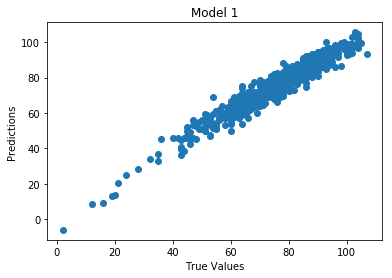

In [20]:
plt.scatter(y_test, predictions)
plt.title("Model 1")
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [21]:
pred_tr = lm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_tr))
print('For Linear Regression Model 1:')
print("Root Mean Squared Error Train: {}".format(rmse_train))
print()
rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error Test: {}".format(rmse_test))
print()

For Linear Regression Model 1:
Root Mean Squared Error Train: 3.86486337422413

Root Mean Squared Error Test: 4.045730349682379



## Test of Model 1 Using Korean Baseball Stats from 2008 to 2018

In [22]:
kb = pd.read_csv('KB_STATS_2008-2018_BP.csv') 
kb.head()

,Tm,BatAge,R/G_x,G_x,PA,AB,R_x,H_x,2B,3B,...,HBP_y,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
0,LG Twins,29.3,NaN,NaN,4742,4184,468,1070,164,23,...,72,3,46,4976,1.551,10.1,0.7,3.9,5.1,1.31
1,Doosan Bears,26.7,NaN,NaN,4974,4344,647,1198,166,37,...,69,5,45,4857,1.317,8.8,0.6,3.0,6.2,2.06
2,Kia Tigers,28.3,NaN,NaN,4831,4210,503,1095,188,28,...,77,5,52,4850,1.380,8.6,0.5,3.8,5.9,1.55
3,Lotte Giants,27.6,NaN,NaN,4890,4256,624,1200,199,22,...,47,2,42,4769,1.379,9.1,0.6,3.3,5.4,1.64
4,SK Wyverns,26.9,NaN,NaN,5003,4332,632,1222,215,23,...,55,2,35,4855,1.304,8.2,0.6,3.5,6.3,1.79


In [23]:
# filter out rows with very low GF values using a boolean mask
mask = (kb['GF'] >= 100 )
kb_fil = kb[mask]

In [24]:
predictors = ['ERA','SV','SLG','OBP','R_x','SO_y','GF','R_y','CG','WHIP','SO9']
X_kb = kb[predictors]
y_kb = kb.W
X_kb.head(3)

,ERA,SV,SLG,OBP,R_x,SO_y,GF,R_y,CG,WHIP,SO9
0,4.88,25,0.353,0.321,468,631,126,646,1,1.551,5.1
1,3.89,26,0.378,0.354,647,780,126,542,0,1.317,6.2
2,4.08,29,0.352,0.336,503,733,127,555,3,1.380,5.9


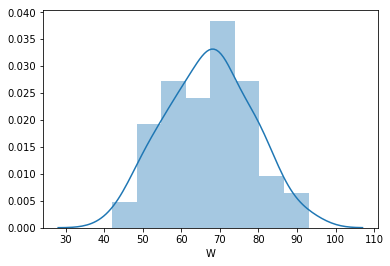

In [25]:
sns.distplot(kb.W)

In [26]:
kb.W.describe()

count    98.000000
mean     67.153061
std      11.030746
min      42.000000
25%      59.000000
50%      68.000000
75%      75.000000
max      93.000000
Name: W, dtype: float64

In [27]:
#y_kb

In [28]:
kb_predictions = lm.predict(X_kb)
kb_predictions

array([ 45.56877656,  70.06893048,  59.47581275,  75.49455767,
        81.83687276,  64.98708245,  54.68470142,  62.3686025 ,
        83.53213475,  71.88290958,  80.83264954,  66.68061737,
        59.1585621 ,  56.19918314,  50.68937522,  69.08489644,
        71.93405345,  72.61504375,  81.51722777,  62.18586159,
        76.9799752 ,  63.2433006 ,  57.59894818,  47.36913936,
        74.08669883,  73.32920797,  80.13268804,  68.49097019,
        73.16489905,  62.51265978,  52.14801239,  54.68604059,
        80.47946349,  71.36975144,  62.80658051,  67.03902451,
        63.424329  ,  67.45931211,  67.0673133 ,  53.6842269 ,
        18.08277475,  42.60773601,  30.04105096,  27.70018711,
        19.23124266,  20.35701157,  14.14911158,   7.9614783 ,
        -7.61148989,  76.4447758 ,  83.58599112,  75.77468054,
        61.04524445,  63.05365454,  58.94689053,  68.31408005,
        52.73274673,  40.57103427,  82.63036287,  89.71735448,
        89.78333302,  68.82430841,  74.54754112,  70.35

In [29]:
print()
print("The RMSE Score For Model 1 Using Korean Baseball Stats:")
rmse_kb = np.sqrt(mean_squared_error(y_kb,kb_predictions))
print(rmse_kb)
print()


The RMSE Score For Model 1 Using Korean Baseball Stats:
13.957328646



In [30]:
print(lm.score(X_kb,y_kb))

-0.617518164941


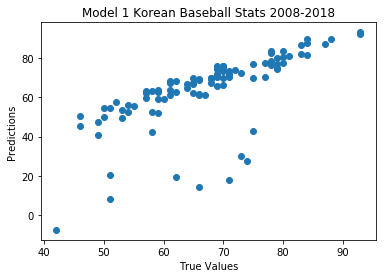

In [31]:
plt.scatter(y_kb,kb_predictions)
plt.title("Model 1 Korean Baseball Stats 2008-2018")
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Select Random Data Points From Korean Baseball Stats: filtered or unfiltered. Remove stats with low GF values.

In [32]:
#kb_rand =  kb.sample(25)
kb_rand =  kb_fil.sample(25)
kb_rand.head(3)

,Tm,BatAge,R/G_x,G_x,PA,AB,R_x,H_x,2B,3B,...,HBP_y,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
29,LG Twins,29.2,4.52,128.0,5157,4522,579,1203,192,15,...,71,6,52,5209,1.412,8.8,0.6,3.9,6.2,1.62
20,Samsung Lions,27.8,5.20,131.0,5287,4436,681,1207,212,14,...,54,3,61,5119,1.358,8.8,0.8,3.4,7.2,2.10
66,KT Wiz,28.5,4.84,144.0,5843,5150,697,1399,234,16,...,88,4,88,5935,1.657,10.8,1.1,4.1,7.5,1.81


In [33]:
predictors = ['ERA','SV','SLG','OBP','R_x','SO_y','GF','R_y','CG','WHIP','SO9']
X_rand = kb_rand[predictors]
y_rand = kb_rand.W

In [34]:
#y_rand

In [35]:
kb_rand_preds = lm.predict(X_rand)
#kb_rand_preds

In [36]:
X_rand['W_pred'] = kb_rand_preds
#X_rand

/Users/scottlew/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


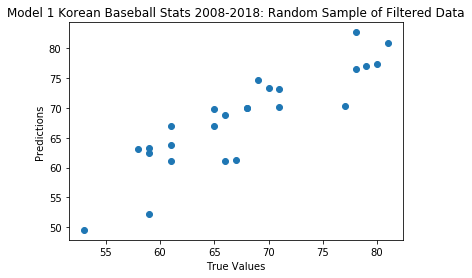

In [37]:
plt.scatter(y_rand,kb_rand_preds)
plt.title("Model 1 Korean Baseball Stats 2008-2018: Random Sample of Filtered Data")
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [38]:
print()
print("The RMSE Score For Model 1 Using Korean Baseball Stats: Random Sample")
rmse_kb_rand = np.sqrt(mean_squared_error(y_rand,kb_rand_preds))
print(rmse_kb_rand)
print()


The RMSE Score For Model 1 Using Korean Baseball Stats: Random Sample
3.93334509755



## RIDGE REGRESSION 

In [39]:
scores_test = []
#alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
alphas = [0.001,0.01,.1]
for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores_test.append(np.sqrt(mean_squared_error(y_test,y_pred)))
                       
scores_test

[4.0456510433757655, 4.0450431876431763, 4.044383435006254]

In [40]:
X_rand = kb_rand[predictors]
y_rand = kb_rand.W
ridge_1 = Ridge(alpha = 0.01).fit(X_train,y_train)
y_pred = ridge.predict(X_rand)
print('RMSE for Random KB stats')
print(np.sqrt(mean_squared_error(y_rand,y_pred)))

RMSE for Random KB stats
3.87839415667


In [41]:
X_rand = kb_rand[predictors]
y_rand = kb_rand.W
ridge_1 = Ridge(alpha = 0.1).fit(X_train,y_train)
y_pred = ridge.predict(X_rand)
print('RMSE for Random KB stats')
print(np.sqrt(mean_squared_error(y_rand,y_pred)))

RMSE for Random KB stats
3.87839415667


In [42]:
X_rand = kb_rand[predictors]
y_rand = kb_rand.W
ridge_1 = Ridge(alpha = 0.001).fit(X_train,y_train)
y_pred = ridge.predict(X_rand)
print('RMSE for Random KB stats')
print(np.sqrt(mean_squared_error(y_rand,y_pred)))

RMSE for Random KB stats
3.87839415667


## Ridge Regression Using 29 Predictors

In [43]:
predictors = ['#Bat','BatAge','G_x','PA','AB', 'R_x','H_x','2B','HR_x',\
 'BB_x','SO_x','OPS+','TB','#P','BB_y','BF','BK','CG','ER',\
 'G_y','GF','H_y','HR_y', 'IP','PAge','R_y','SO_y','SV','WP']

In [44]:
y = df.W
X = df[predictors]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 29) (2252,)
(563, 29) (563,)


In [45]:
ridge2 = Ridge().fit(X_train,y_train)
y_pred = ridge2.predict(X_test)
print('Ridge Regression Using 29 Predictors RMSE for test data')
print(np.sqrt(mean_squared_error(y_test,y_pred)))

Ridge Regression Using 29 Predictors RMSE for test data
3.85366782953


In [46]:
scores_test = []
#alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
alphas = [0.001,0.01,.1]
for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores_test.append(np.sqrt(mean_squared_error(y_test,y_pred)))
                       
scores_test

[3.8534550038176012, 3.8534576700023608, 3.8534833285474548]

In [47]:
min(scores_test)

3.8534550038176012

In [48]:
ridge2 = Ridge(alpha=0.001).fit(X_train,y_train)
y_pred = ridge2.predict(X_test)
print('Ridge Regression Using 29 Predictors RMSE for test data with alpha of 0.001')
print(np.sqrt(mean_squared_error(y_test,y_pred)))

Ridge Regression Using 29 Predictors RMSE for test data with alpha of 0.001
3.85345500382


In [49]:
predictors2 = ['OBP','SLG','R_x','PA','AB','ERA','SV','SO9','WHIP','IP','PA','BB_y','R_y',]
y = df.W
X = df[predictors2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2252, 13) (2252,)
(563, 13) (563,)


In [50]:
ridge3 = Ridge().fit(X_train,y_train)
y_pred = ridge3.predict(X_test)
print('Ridge Regression Using 13 Predictors RMSE for test data')
print(np.sqrt(mean_squared_error(y_test,y_pred)))

Ridge Regression Using 13 Predictors RMSE for test data
4.29735398188


In [51]:
scores_test = []
#alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
alphas = [0.001,0.01,.1]
for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores_test.append(np.sqrt(mean_squared_error(y_test,y_pred)))
                       
scores_test

[4.2829774553442066, 4.2816399772765923, 4.283881135167781]

In [52]:
df2 = pd.read_csv('MLB_STATS_Pythag.csv')

In [53]:
df2.head(3)

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SV,W,W-L%,WHIP,WP,cSho,tSho,RunsRatio,RunsPercent,Pythag
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,2,14,0.237,1.498,33,1.0,1.0,0.707865,0.414474,0.333810
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,7,39,0.557,1.323,46,3.0,3.0,1.046667,0.511401,0.522789
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,4,52,0.788,1.075,3,8.0,9.0,2.428016,0.708286,0.854973


In [54]:
# Select regressor predictors for response variable wins
predictors = ['#Bat','BatAge','G_x','PA','AB','H_x','2B','HR_x',\
 'BB_x','SO_x','OPS+','TB','#P','BB_y','BF','BK','CG','ER',\
 'G_y','GF','H_y','HR_y', 'IP','PAge','SO_y','SV','WP','Pythag']

print(len(predictors))

y = df2.W
X = df2[predictors2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

28
(2252, 13) (2252,)
(563, 13) (563,)


In [55]:
ridge4 = Ridge().fit(X_train,y_train)
y_pred = ridge4.predict(X_test)
print('Ridge Regression Using 28 Predictors RMSE for test data')
print(np.sqrt(mean_squared_error(y_test,y_pred)))

Ridge Regression Using 28 Predictors RMSE for test data
4.29735398188
